(supervised:ann:basics)=
# ANN Basics

Supervised learning aims at approximating a function $f:X\rightarrow Y$ by a function $f_{\mathrm{approx}}:X\rightarrow Y$ based on a finite set of examples $(x_1,y_1),\ldots,(x_n,y_n)$ satisfying $f(x_l)=y_l$ or at least $f(x_l)\approx y_l$ for $l=1,\ldots,n$. Almost always we have finite dimensional feature spaces $X=\mathbb{R}^m$ and target spaces $Y=\mathbb{R}$.

A good hypothesis $f_{\mathrm{approx}}$ has to satisfy $f_{\mathrm{approx}}(x)\approx f(x)$ for all $x$ from the example set (good fit on training set) and for all other $x$ expected to appear in the underlying practical problem (good generalization). To construct good hypotheses we have to pose additional assumptions on $f_{\mathrm{approx}}$.

In linear regression we assume that the hypothesis is a linear combination of several prescribed basis functions. The coefficients are chosen to minimize the fitting error on the training set.
Artificial neural networks follow the same idea: take some function containing several parameters and choose parameters such that the fitting error on the training set is small.
The only difference to linear regression is the chosen ansatz. Typically one does not write down an explicit formula for $f_{\mathrm{approx}}$, but one provides a graphical scheme containing all information about the hypothesis. In contrast to linear regression, ANNs contain the parameters in a nonlinear fashion, resulting in more difficult minimization procedures. ANNs thus are an example for nonlinear regression. ANNs can be used for classification, too (see below).

## Motivation from Biology

ANNs originated from the wish to simulate human brains. A brain consists of many nerve cells (neurons) interconnected to transmit information (electrical pulses). All nerve cells have similar structure. The strength of interconnections between different nerve cells may vary and it is this varying strength which allows humans to learn new things. Learning, as far as we know, is realized by changing the strength of interconnections between nerve cells and, thus, reducing or improving the flow of information between different cells. A neuron takes all the electrical pulses from connected cells (inputs) and generates an output pulse from the inputs.

```{figure} xkcd2173.png
---
alt: line drawing showing two people talking about sorting a photo archive
---
It also works for anything you teach someone else to do. "Oh yeah, I trained a pair of neural nets, Emily and Kevin, to respond to support tickets." Source: Randall Munroe, [xkcd.com/2173](https://xkcd.com/2173)
```

Of course human brains are much more complicated than described here and many mechanisms are not well understood. But the idea of many interconnected simple units forming a large powerful machine seems to be a key to artificial intelligence. ANNs try to simulate such networks of neurons on a digital computer.

Next to ANNs there exist several other ideas based on the concept of connecting many simple units. If you are interested have a look at [cellular automata](https://en.wikipedia.org/wiki/Cellular_automaton) and [collective intelligence](https://en.wikipedia.org/wiki/Collective_intelligence).

## Artificial Neurons

ANNs are composed of artificial neurons, mimicking biological neurons. An artificial neuron is a function taking $p$ inputs and yielding one output. Inputs and outputs are real numbers. Each input is multiplied by a *weight*, then all the products are added, and an *activation function* is applied to the sum. The outcome of the activation function is the neuron's output.

Weights correspond to the strength of interconnections between biological neurons. The activation function simulates the fact, that a biological neuron fires (that is, generates an output pulse) only if the level and number of input pulses is high enough.

Activation functions almost always are monotonically increasing. Some examples:

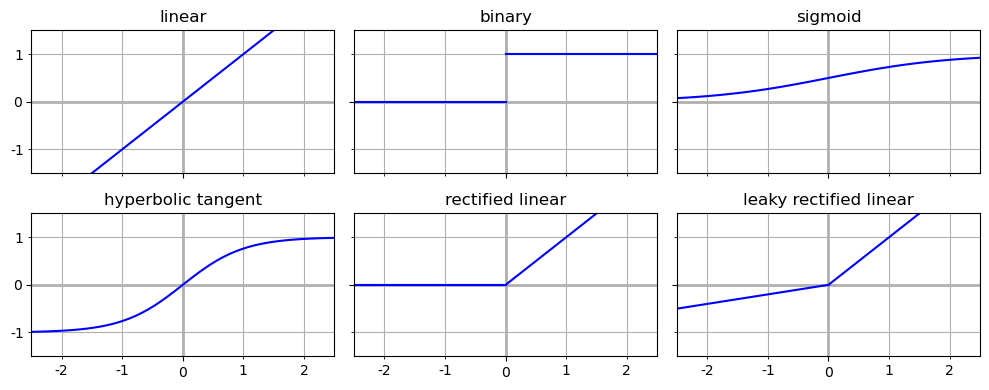

In [53]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 3, figsize=(10, 4), sharex=True, sharey=True, tight_layout=True)

x = np.linspace(-2.5, 2.5)

axs[0, 0].plot(x, x, '-b')
axs[0, 0].set_title('linear')

axs[0, 1].plot([x.min(), 0], [0, 0], '-b')
axs[0, 1].plot([0, x.max()], [1, 1], '-b')
axs[0, 1].set_title('binary')

y = 1 / (1 + np.exp(-x))
axs[0, 2].plot(x, y, '-b')
axs[0, 2].set_title('sigmoid')

y = np.tanh(x)
axs[1, 0].plot(x, y, '-b')
axs[1, 0].set_title('hyperbolic tangent')

axs[1, 1].plot([x.min(), 0], [0, 0], '-b')
axs[1, 1].plot([0, x.max()], [0, x.max()], '-b')
axs[1, 1].set_title('rectified linear')

axs[1, 2].plot([x.min(), 0], [0.2 * x.min(), 0], '-b')
axs[1, 2].plot([0, x.max()], [0, x.max()], '-b')
axs[1, 2].set_title('leaky rectified linear')

axs[0, 0].set_xlim(-2.5, 2.5)
axs[0, 0].set_xticks([0])
axs[0, 0].set_xticks([-2, -1, 1, 2], minor=True)
axs[0, 0].set_xticklabels([-2, -1, 1, 2], minor=True)
axs[0, 0].set_ylim(-1.5, 1.5)
axs[0, 0].set_yticks([0])
axs[0, 0].set_yticks([-1, 1], minor=True)
axs[0, 0].set_yticklabels([-1, 1], minor=True)

for row in range(2):
    for col in range(3):
        axs[row, col].grid(which='both')
        axs[row, col].grid(lw=2)

plt.show()

More activation functions are shown in the Wikipedia article on [activation functions](https://en.wikipedia.org/wiki/Activation_function#Comparison_of_activation_functions).
Which activation function to choose depends on the underlying practical problem and heavily on experience.

Denoting the inputs by $u_1,\ldots,u_p\in\mathbb{R}$, the weights by $w_1,\ldots,w_p\in\mathbb{R}$, the activation function by $g:\mathbb{R}\to\mathbb{R}$, and the output by $v\in\mathbb{R}$, we have
\begin{equation*}
v=g\left(\sum_{\kappa=1}^p w_\kappa\,u_\kappa\right).
\end{equation*}
If $u$ is the vector of inputs and $w$ is the vector of weights, we may write
\begin{equation*}
v=g\bigl(w^{\mathrm{T}}\,u\bigr).
\end{equation*}

## Networks of Artificial Neurons

The simplest ANN consists of only one neuron. It takes the the feature values $x^{(1)},\ldots,x^{(m)}$ of a feature vector $x$ as inputs, that is, $p=m$, and the output is interpreted as prediction for the corresponding target $f(x)$.

We could also take more neurons and feed them with all or some of the feature values. Then the outputs of all neurons may be fed to one or more other neurons and so on. This way we obtain a network of neurons similar to biological neural networks (brains). The output of one of the neurons is interpreted as prediction for the targets.

ANNs can be represented graphically. Each neuron is a circle or rect containing information about the activation function used by the neuron. Connections between inputs and outputs are lines and the weights are numbers assigned to the corresponding input's line.

```{figure} ann-5neurons.svg
---
alt: simple ANN with 5 neurons
---
A simple ANN with 5 neurons. Neurons are depicted as circles. Rectangles symbolize input and ouput values.
```

The depicted ANN contains 5 neurons. It's a special case of a fully connected two-layered feedforward network. These terms will be introduced below. We may write down corresponding hypothesis $f_{\mathrm{approx}}$ as mathematical formula. Denote the weight vectors by $w$, $\hat{w}$, $\mathring{w}$, $\tilde{w}$, $\bar{w}$ and the activation functions by $g$, $\hat{g}$, $\mathring{g}$, $\tilde{g}$, $\bar{g}$. Then we have
\begin{equation*}
f_{\mathrm{approx}}(x)=\bar{g}\Bigl(\bar{w}_1\,g\bigl(w^{\mathrm{T}}\,x\bigr)+\bar{w}_2\,\hat{g}\bigl(\hat{w}^{\mathrm{T}}\,x\bigr)+\bar{w}_3\,\mathring{g}\bigl(\mathring{w}^{\mathrm{T}}\,x\bigr)+\bar{w}_4\,\tilde{g}\bigl(\tilde{w}^{\mathrm{T}}\,x\bigr)\Bigr)
\end{equation*}
with 16 parameters (all the weights). Those 16 parameters have to be chosen to solve
\begin{equation*}
\frac{1}{n}\,\sum_{l=1}^n\bigl(f_{\mathrm{approx}}(x_l)-y_l\bigr)^2\to\min_{\text{weights}}
\end{equation*}
with training samples $(x_1,y_1),\ldots,(x_n,y_n)$.
Below we will discuss how to solve such nonlinear minimization problems numerically.

## Feedforward and Layered Networks

There are many kinds of ANNs and we will meet most of them when going on studying data science. The simplest and most widely used type of ANNs are feedforward networks. Those are networks in which information flows only in one direction. The feature values are fed to a set of neurons. Corresponding outputs are fed to a different set of neurons and so on. The process always ends with a single neuron yielding the prediction. No neuron is used twice. In contrast there are ANNs which feed a neuron's output back to another neuron involved in generating the neuron's input. Such ANNs contain circles and it is not straight forward how to compute the ANN's output. It's a dynamic process which may converge or not. Although such ANNs are more close to biological neural networks, they are rarely used because of their computational complexity. Only very special and well structured non-feedforward ANNs appear in practice.

To allow for more efficient computation, feedforward ANNs often are organized in layers. A layer is a set of neurons with no interconnections. Neurons of a layer only have connections to other layers. Layers are organized sequentially. Inputs of the first layer's neurons are connected to the network inputs (feature values). Outputs are connected to the inputs of the second layer's neurons. Outputs from second layer are connected to inputs of third layer and so on. The last layer has only one neuron yielding the ANN's output.

```{figure} layers.svg
---
alt: layered ANN
---
A layered ANN with 3 or 4 layers (depending on the definition of *number of layers*).
```

A layer may be fully connected to previous and next layer or some connections may be missing (corresponding weights are fixed to zero). Networks with all layers fully connected are called *dense networks*.

Computational efficiency of layered feedword networks stems from the fact that the outputs of all neurons in a layer can be computed simultaneously by matrix vector multiplication. Matrix vector multiplication is a very fast operation on modern computers, especially if additional GPU (graphics processing unit) capabilities are available.

If $u$ is the vector of inputs of a layer (that is, the vector of outputs of the previous layer), then to get the output of each neuron we have to compute the inner products $w^{\mathrm{T}}\,u$ with $w$ being different for each neuron. Taking all the weight vectors of the neurons in the layer as rows of a matrix $W$ the components of $W\,u$ are exactly those inner products. If all neurons in the layer use the same activation function (which typically is the case), then we simply have to apply the activation function to all components of $W\,u$ to get the layer's outputs.

In a three-layered network with weight matrices $W_1,W_2,W_3$ and (per layer) activation functions $g_1,g_2,g_3$ we would have
\begin{equation*}
f_{\mathrm{approx}}(x)=g_3\Bigl(W_3\,g_2\bigl(W_2\,g_1(W_1\,x)\bigr)\Bigr),
\end{equation*}
where the activation functions are applied componentwise.

## Training ANNs

Training an ANN means solving the minimization problem
\begin{equation*}
\frac{1}{n}\,\sum_{l=1}^n\bigl(f_{\mathrm{approx}}(x_l)-y_l\bigr)^2\to\min_{\text{weights}}.
\end{equation*}
The dependence of $f_{\mathrm{approx}}$ on the weights is highly nonlinear. Thus, there is no simple analytical solution. Instead we have to use numerical procedures to find weights which are at least close to minimizing weights.

The basic idea of such numerical algorithms is to start with arbitrary weights and to improve weights iteratively. Next to several more advanced techniques, there is a class of algorithms known as *gradient descent method*. They take the gradient of the objective function to calculate improved weights. The negative gradient is the direction of steepest descent. Thus, it should be a good idea to modify weights by substracting the gradient from the current weights. We stop the iteration, if the gradient is close to zero, that is, if we reached a stationary point.

Gradient descent methods suffer from different problems:
* We need to calculate the gradient of the objective with respect to the weights analytically. Due to the structure of ANNs this involves repeated application of the chain rule for differentiation.
* Usually we end up in an arbitrary stationary point. With some luck it's at least a local minimizer. Finding the global minimizer of a nonlinear function with gradient descent is almost impossible.
* Convergence is slow. We have to do many iterations to find a stationary point.

Due to their simplicity, gradient descent methods are the standard technique for training ANNs. More involved methods only work for special ANNs, whereas gradient descent is almost always applicable.

We will cover the details of gradient descent in a subsequent chapter.

## Overfitting and Regularization

Large ANNs tend to overfit the training data. As for linear regression we might add a penalty to the objective function to avoid overfitting. Concerning overfitting and regularization there is no difference between linear regression and ANNs.

For ANNs there also exist regularization techniques not applicable to linear regression. One such technique is kown as *drop out*. In each training step the weights of a randomly selected set of neurons are held fixed, that is, they are excluded from training. This set changes from step to step and the size of the set is a hyperparameter. The idea is to get more redundancies in the ANN and, thus, more reliable predictions. Especially, generalization power can be improved by drop out.

## Hyperparameters

ANNs contain two obvious hyperparameters:
* number of layers,
* number of neurons in each layer.

But activation functions may be regarded as hyperparameters, too, since we have to choose them in advance.

There is no essential difference between tuning hyperparameters for ANNs and tuning hyperparameters for linear regression.

## Bias Neurons

Artificial neurons suffer from a problem with inputs being all zero. If all inputs are zero, then multiplication with weights yields zero, too. Activation functions again map zero to zero. Thus, artificial neurons are not able to give a nonzero response to all-zero inputs.

One solution would be to use activation functions with nonzero activation for zero input. But this would contradict the idea of an activation function and we would have to add parameters to activation functions to get variable output for all-zero inputs.

A better idea is to add a *bias neuron* to each layer. A bias neuron takes no inputs and always yields the number one as its output. Neurons in the next layer connected to the bias neuron of the previous layer now always have nonzero input. With the corresponding weight we are able to adjust the size of the input. Even if all regular inputs are zero we are able to yield nonzero neuron output this way.

```{figure} bias.svg
---
alt: ANN with bias neurons
---
Bias neurons are represented by circles with a one inside.
```

Denote the activation function of a neuron by $g$. If $w_0$ is the weight for the input from the bias neuron and if $w$ and $u$ are the vectors of regular weights and inputs, respectively, then the neuron's output is
\begin{equation*}
g\bigl(w_0+w^{\mathrm{T}}\,u\bigr).
\end{equation*}
We see that using bias neurons, the activation function is shifted to the left or to the right, depending on the weight $w_0$.

For instance, if we use the activation function
\begin{equation*}
g(t)=\begin{cases}1,&\text{if }t>0,\\0,&\text{else},\end{cases}
\end{equation*}
which fires if and only if the weighted inputs add up to a positive number, then introducing a bias neuron, we obtain
\begin{equation*}
g\bigl(w_0+w^{\mathrm{T}}\,u\bigr)=\begin{cases}1,&\text{if }w^{\mathrm{T}}\,u>-w_0,\\0,&\text{else}.\end{cases}
\end{equation*}
That is, the neuron fires if the sum of weighted regular inputs lies above $-w_0$. In this special case, bias neurons allow for modifying the threshold for acitvation without modifying the activation function.

From the training point of view, bias neurons do not matter, because they have inputs and thus no weights to train.

## Approximation Properties

In linear regression it is obvious which types of functions can be represented by the ansatz for $f_{\mathrm{approx}}$ (linear functions, polynomials, and so on). For ANNs we have to look more closely.
Representable function classes depend on the activation function, on the number of layers, and on the number of neurons in each layer.

For instance, if we have only one layer and we use threshold activation (zero or one), then $f_{\mathrm{approx}}$ always is a piecewise constant function. With rectified linear units we always would obtain piecewise linear functions.

Considering more than one layer, things become tricky. But an important result in the theory of ANNs states, that an ANN with at least one layer is able to approximate arbitrary continuous functions. We simply have to use enough neurons. The more neurons the better the approximation.

The number of neurons required for good approximation in a single layer ANN might be very large. Often it is computationally more efficient to have more layers with less neurons. There exist many results on approximation properties of ANNs. The keyword is *universal approximation theorems*.

## Vector-valued Regression

Up to now we only considered approximating realvalued functions of several variables (features), that is, the underlying truth has continuous range in $\mathbb{R}$. If we want to approximate functions $f$ taking values in some higher dimensional space $\mathbb{R}^d$, then we could apply linear regression or ANNs to each of the $d$ components of the function independently (multiplying computational cost by factor $d$).

In constrast to linear regression, ANNs allow for more natural extension to multiple outputs. We simply have to add some neurons to the output layer. This way, the 'knowledge' of the ANN can be used by all outputs without training individual nets for each output component.

```{figure} multiple-outputs.svg
---
alt: ANN with three outputs
---
An ANN with three outputs. Number of outputs is independent of the ANN's overall structure.
```

Squared error loss for vector-valued regression is
\begin{equation*}
\frac{1}{n}\,\sum_{l=1}^n\bigl|f_{\mathrm{approx}}(x_l)-y_l\bigr|^2,
\end{equation*}
where $f_{\mathrm{approx}}(x_l)-y_l$ is a vector with $d$ components and $|\cdot|$ denotes the length of a vector.

## ANNs for Classification

An import application of multiple output ANNs are classification tasks. Classification differs from regression in that the range of the truth $f$ is discrete with only few different values (classes). If we predict for each class the probability that a feature vector belongs to this class, we have a regression problem with multiple outputs. Thus, ANNs can be used for solving classification problems, too.

ANNs may adapted to classification task in several ways, which we briefly discuss here.

### Number of Outputs

Especially for binary classification task we have to decide whether the ANN has one output or two outputs. With one output (and sigmoid activation in the output neuron) predictions close to 1 indicate one class, predictions close to 0 indicate the other class. With two output neurons (sigmoid each) the ANN is able to predict 'both classes' (both outputs close to one) or 'no class' (both outputs close to zero). Which variant to choose depends on the context.

For multiclass classification with $C$ class the analog question is whether to use $C$ or $C-1$ output neurons.

### Softmax Activation

Having as many output neurons as classes may result in unclear predictions if sigmoid activation is used in each output neuron (multiple outputs could be close to one). Better for interpretation would be a scoring procedure guaranteeing that all scores add up to 1. Then scores can be interpreted as probability that the input belongs to a certain class.

To implement probability-like scores in ANNs there is the *softmax activation function*. Strictly speaking it's not an activation function because it does not work per neuron but applies jointly to the activations of several neurons. For a classification problem with $C$ classes denote by $a_1,\ldots,a_C$ the output neurons' activations (weighted sums of inputs plus bias) and by $o_1,\ldots,o_C$ the outputs (activation function applied to activations). Then softmax activation computes
\begin{equation*}
o_i=\frac{\mathrm{e}^{a_i}}{\sum\limits_{j=1}^C\mathrm{e}^{a_j}}\qquad\text{for }i=1,\ldots,C.
\end{equation*}
The exponential function maps (arbitrary) activations to $(0,\infty)$ and results are weighted to add up to 1.

### Log Loss

Mean squared error loss also works for probability-like scores (ANN outputs). But log loss is much more suitable because it interprets ANN outputs as probabilities and computes the overall predicted probability on a test set, that all samples belong to their true class.